In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from _config import PATH_RAW_DTU_SOLAR_STATION

In [4]:
# Get all CSV files in the path folder
csv_files = list(PATH_RAW_DTU_SOLAR_STATION.glob("*.csv"))

# Read each CSV file and combine them into a single DataFrame
dfs = [pd.read_csv(f) for f in csv_files]
df = pd.concat(dfs, ignore_index=True)
df.set_index('Time(utc)', inplace=True)
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.head()

,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
Time(utc),,,,,,,,,,,,
2020-01-01 00:00:00,-2.725,-0.631118,-2.718,253.674819,1.7,283.0,3.4,1023.0,83.0,0.0,0.0,0.0
2020-01-01 00:01:00,-2.776,-0.595784,-2.749,253.775029,1.3,260.0,3.3,1023.0,82.9,0.0,0.0,0.0
2020-01-01 00:02:00,-2.673,-0.568635,-2.724,253.775018,3.5,295.0,3.4,1023.0,83.2,0.0,0.0,0.0
2020-01-01 00:03:00,-2.356,-0.541486,-2.504,253.674755,2.2,290.0,3.4,1023.0,83.5,0.0,0.0,0.0
2020-01-01 00:04:00,-2.468,-0.724344,-2.529,253.875054,1.5,285.0,3.5,1023.0,83.1,0.0,0.0,0.0


In [5]:
df.columns

Index(['GHI', 'DNI', 'DHI', 'LWD', 'wind_speed_avg', 'wind_dir_avg',
       'air_temperature', 'air_pressure', 'relative_humidity',
       'rain_accumulation', 'rain_duration', 'rain_intensity'],
      dtype='object')

In [6]:
display(df.describe().round(3), df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2630880 entries, 2020-01-01 00:00:00 to 2025-01-01 08:04:00
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   GHI                float64
 1   DNI                float64
 2   DHI                float64
 3   LWD                float64
 4   wind_speed_avg     float64
 5   wind_dir_avg       float64
 6   air_temperature    float64
 7   air_pressure       float64
 8   relative_humidity  float64
 9   rain_accumulation  float64
 10  rain_duration      float64
 11  rain_intensity     float64
dtypes: float64(12)
memory usage: 260.9 MB


,GHI,DNI,DHI,LWD,wind_speed_avg,wind_dir_avg,air_temperature,air_pressure,relative_humidity,rain_accumulation,rain_duration,rain_intensity
count,2560838.000,2536356.000,2535319.000,2480221.000,2569890.000,2569890.000,2569681.000,2569853.000,2569853.000,2569890.000,2569890.000,2569890.000
mean,120.567,128.234,57.412,856.769,2.633,203.978,10.097,1007.257,72.684,0.001,2.101,0.065
std,209.785,266.978,92.852,10886.152,1.766,89.900,6.498,10.857,14.129,0.014,10.164,0.826
min,-9.758,-12.520,-23.610,-7.325,0.000,0.000,-9.700,958.200,16.700,0.000,0.000,0.000
25%,-1.226,-0.309,-1.163,293.258,1.300,123.000,4.900,1001.000,64.100,0.000,0.000,0.000
50%,2.992,-0.019,3.613,324.782,2.300,232.000,9.700,1008.000,76.400,0.000,0.000,0.000
75%,152.075,14.719,84.620,349.984,3.500,273.000,15.100,1015.000,84.000,0.000,0.000,0.000
max,1259.000,1001.190,868.100,311300.000,22.500,359.000,31.600,1044.000,92.500,1.850,110.000,115.400


None

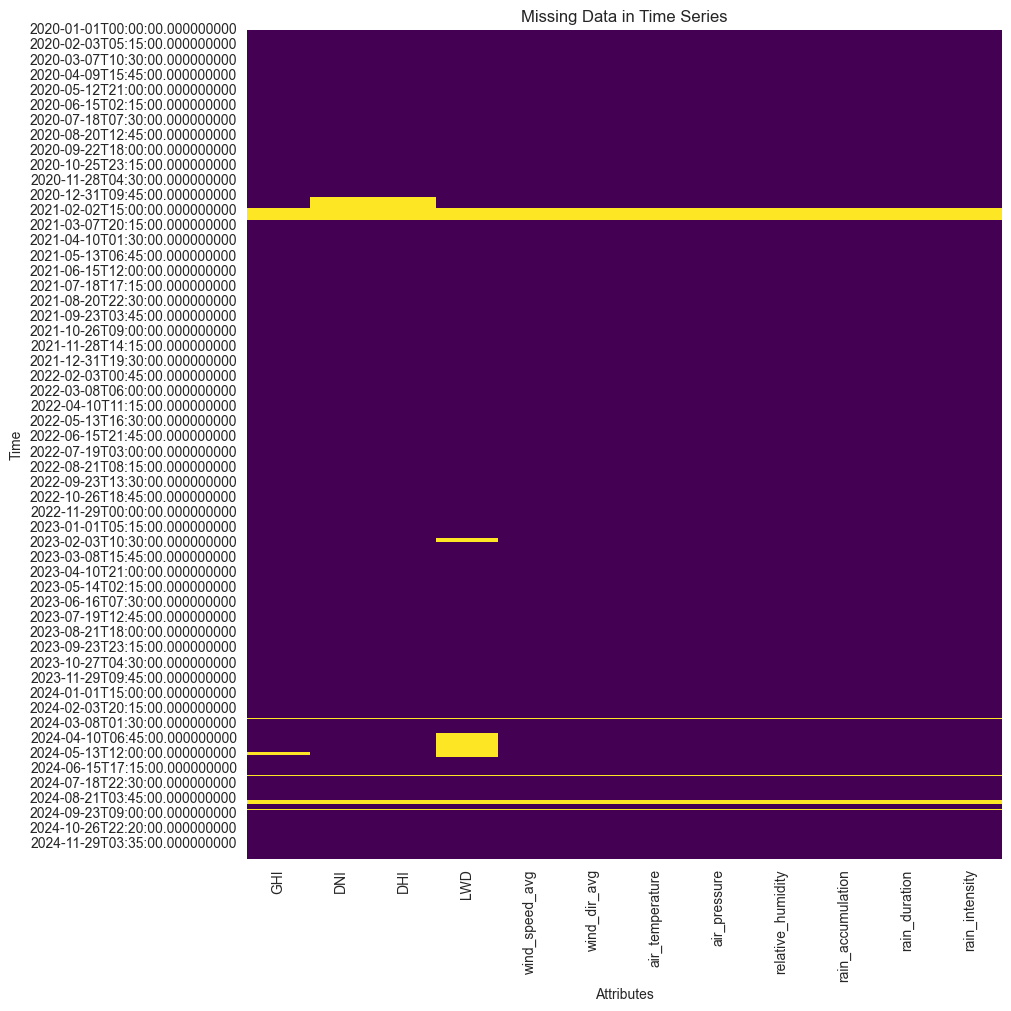

In [12]:
# Create a boolean DataFrame indicating where values are missing
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 10), layout='constrained')
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Missing Data in Time Series')
plt.xlabel('Attributes')
plt.ylabel('Time')
# plt.savefig('missing_data.png', dpi=100)
plt.show()

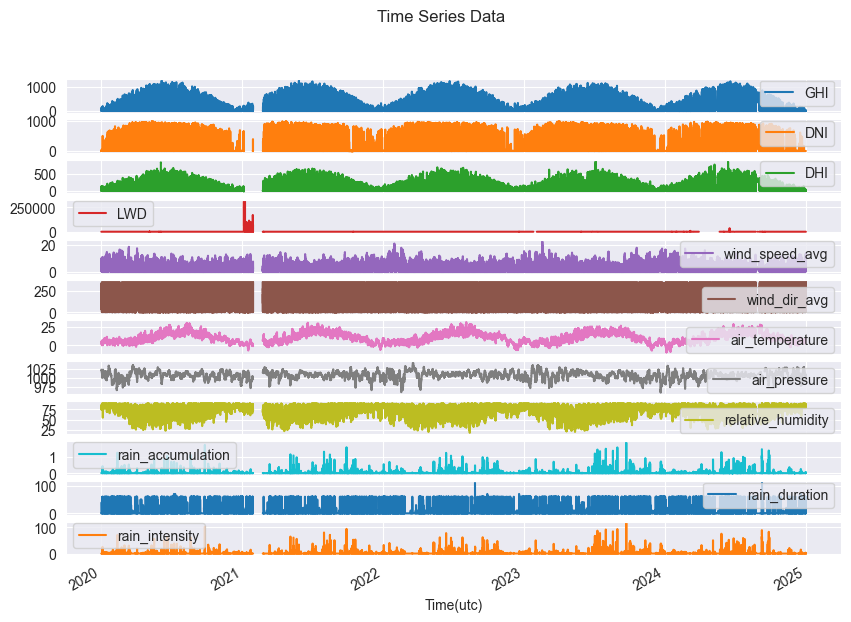

In [52]:
df.plot(figsize=(10, 7), title='Time Series Data', subplots=True)
# plt.savefig('time_series_data.png', dpi=100)
plt.show()

Problems with specific period and extreme values on LWD:

In [53]:
import numpy as np
# Plotting the time series data
mask = (df.index < "2021-01-04") | (df.index > "2021-02-23")
df_filtered = df[mask].copy()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['LWD'].quantile(0.25)
Q3 = df['LWD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for non-extreme values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out extreme values (outliers)
df_filtered = df[(df['LWD'] >= lower_bound) & (df['LWD'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)
# df_filtered['LWD'].plot()

Original DataFrame shape: (2630880, 12)
Filtered DataFrame shape: (2434369, 12)


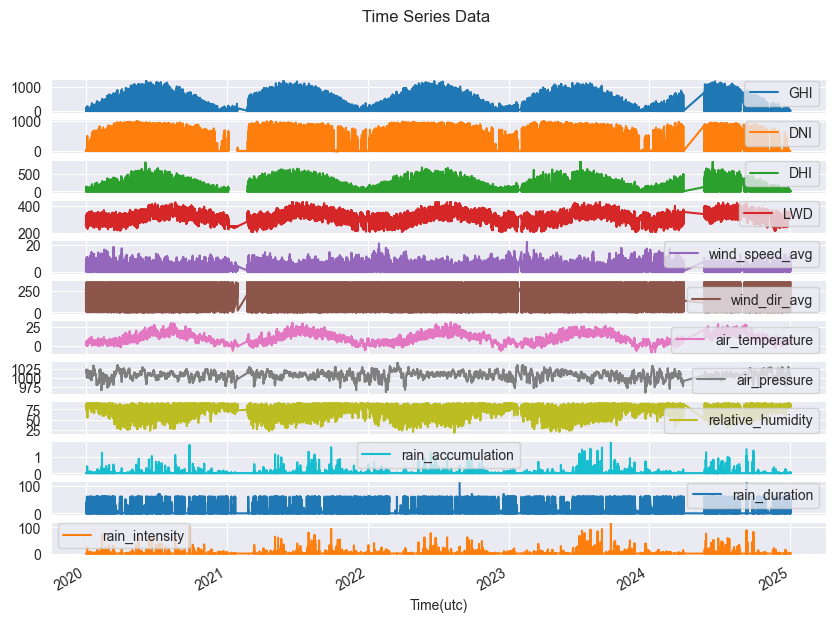

In [54]:
df_filtered.plot(figsize=(10, 7), title='Time Series Data', subplots=True)
plt.show()

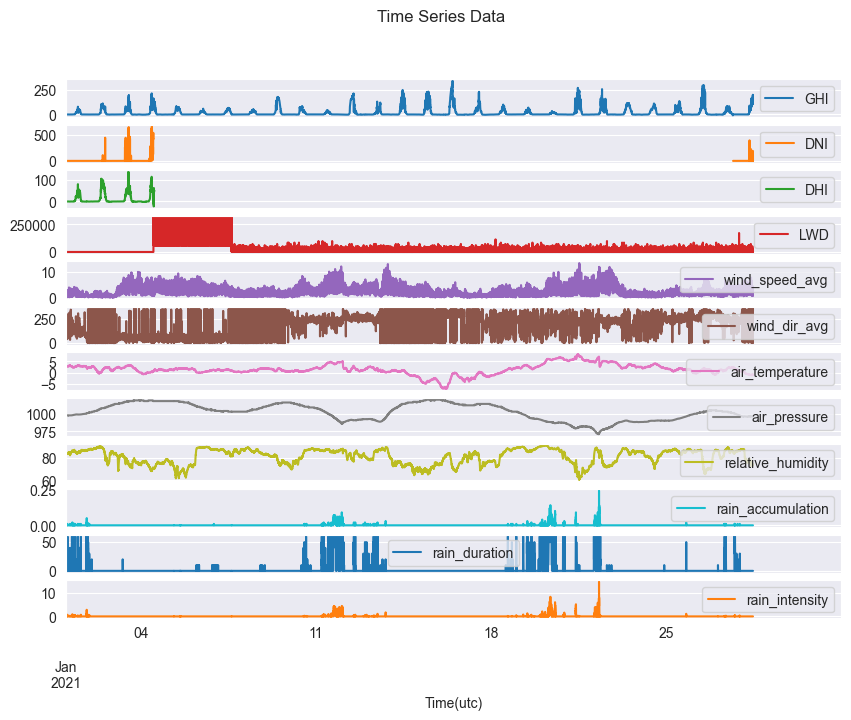

In [38]:
# Plotting the time series data
df.loc['2021-01'].plot(figsize=(10, 7), title='Time Series Data', subplots=True)
# plt.savefig('time_series_data_bad_2021-01.png', dpi=100)
plt.show()

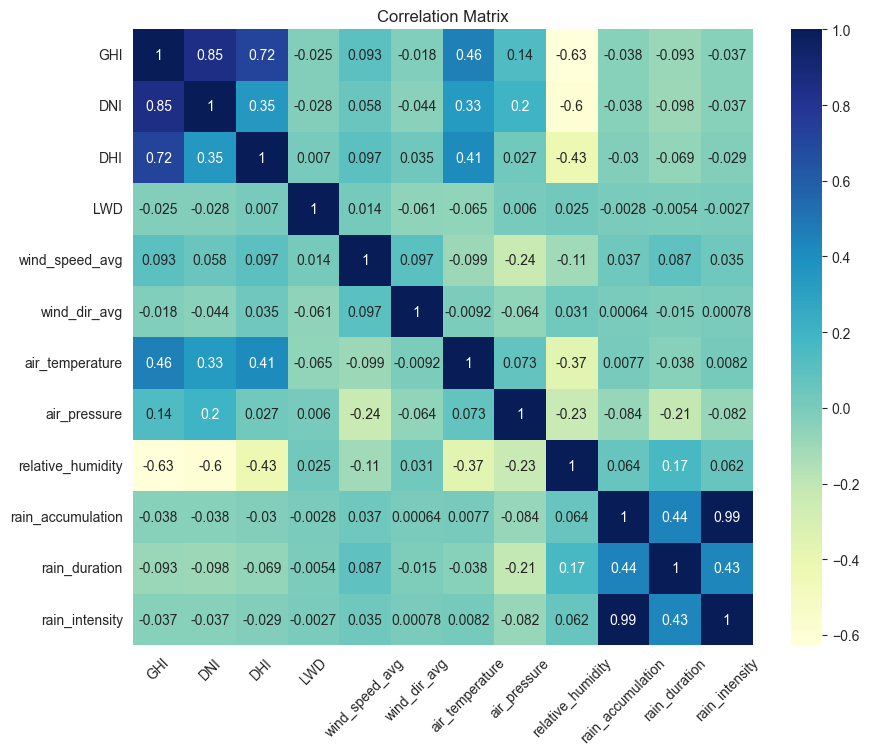

In [36]:
corr_std = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_std, annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.xticks(rotation=45)
plt.savefig('correlation_matrix_raw.png', dpi=100)
plt.show()

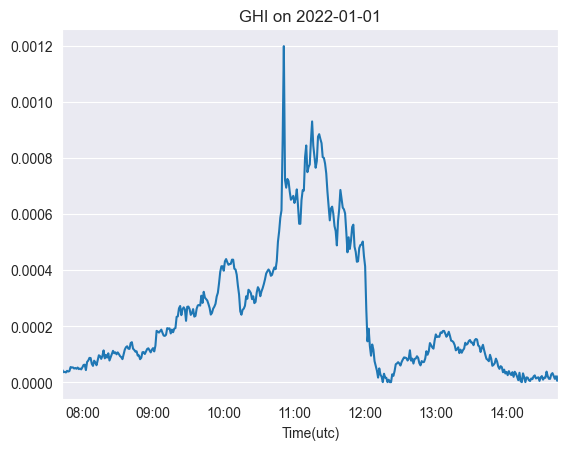

In [22]:
# select random date and plot the GHI
date = '2022-01-01'
df.loc[date, 'DNI'].plot()
plt.title(f'GHI on {date}')
plt.show()


datetime.date(2020, 4, 7)

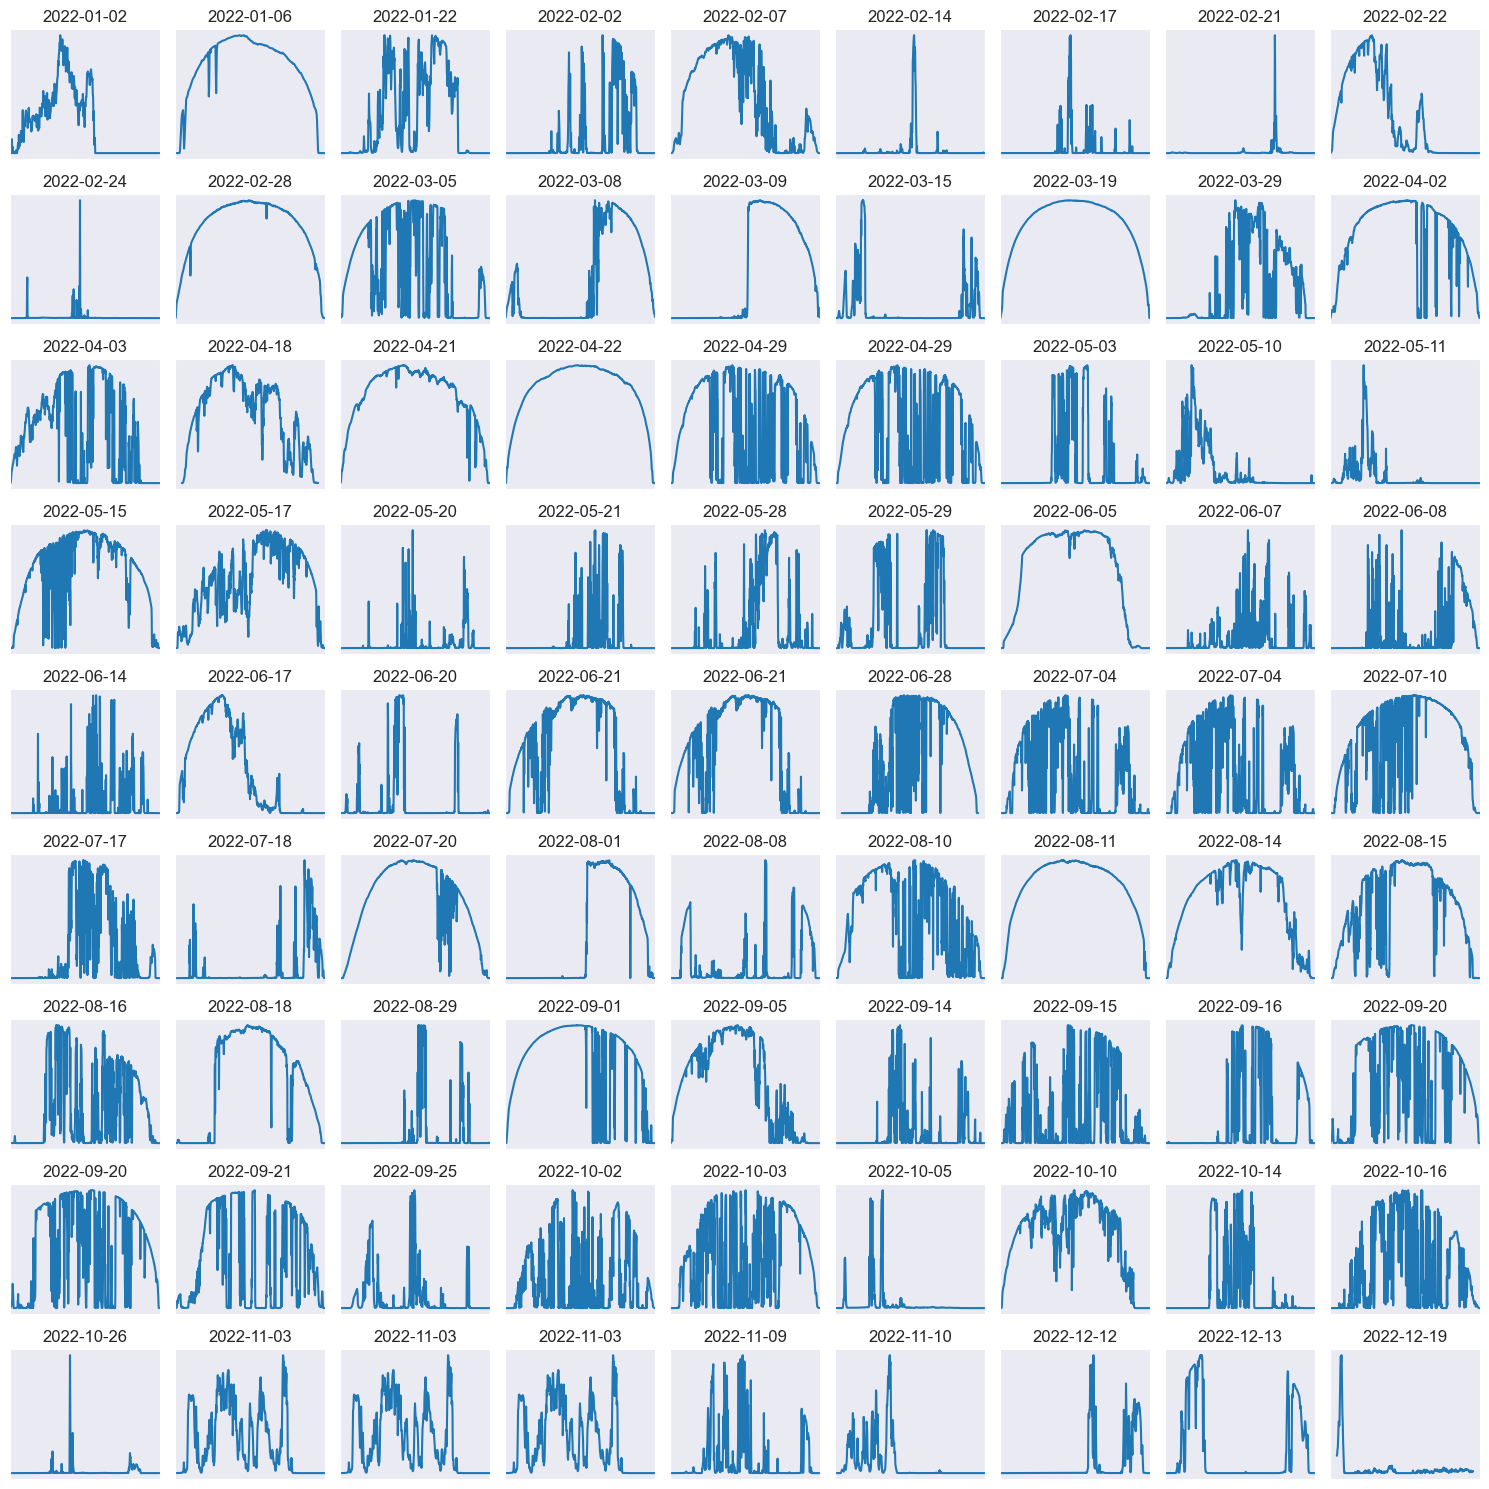

In [41]:
# Generate a large plot with subplots for random dates in the dataset
import random
df_tmp = df.loc['2022']
dates = random.sample(list(df_tmp.index), 81)
# sort the dates
dates = sorted(dates)
fig, axes = plt.subplots(9, 9, figsize=(15, 15))
for i, date in enumerate(dates):
    ax = axes[i // 9, i % 9]

    date_str = date.strftime('%Y-%m-%d')
    ax.set_title(f'{date_str}')
    df_tmp.loc[date_str, 'DNI'].plot(ax=ax)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,
               left=False, right=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.show()

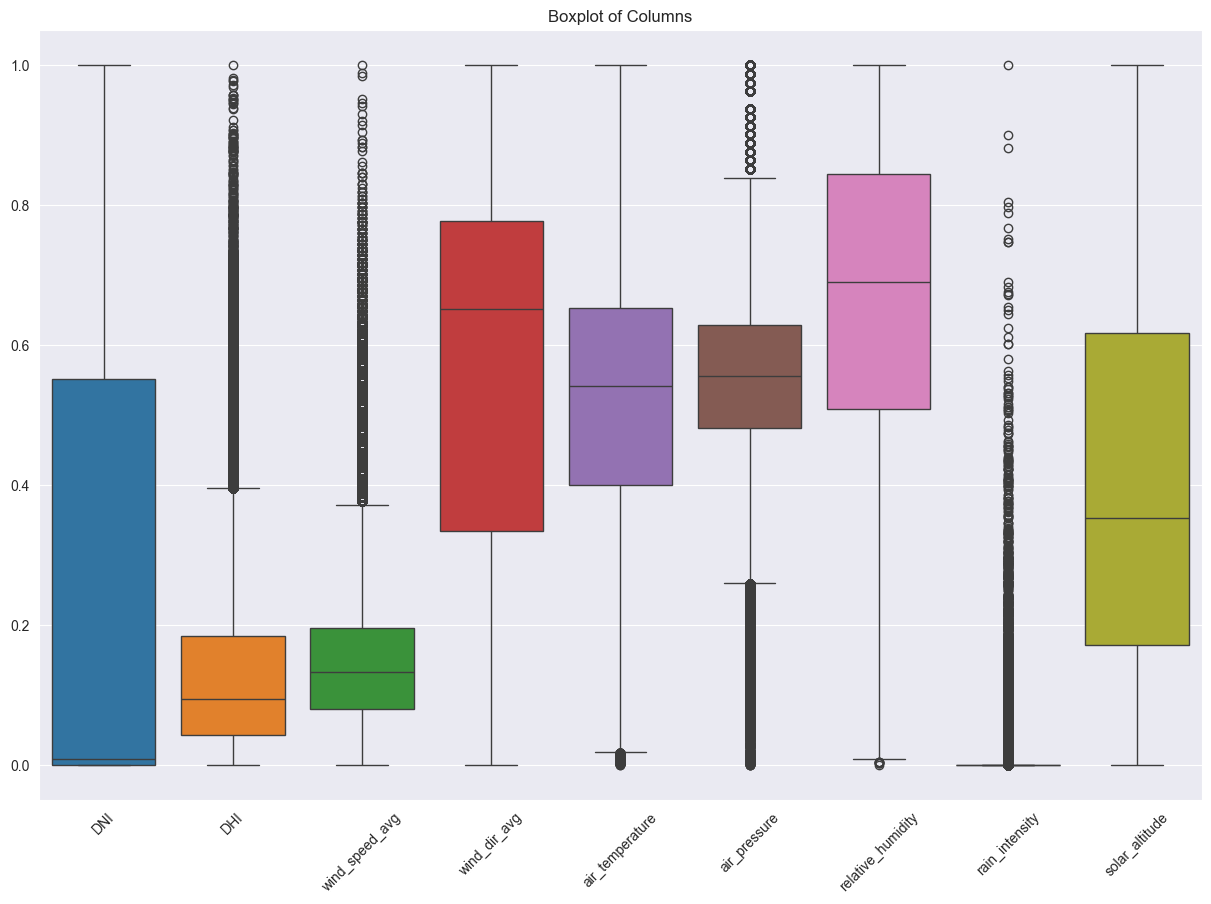

In [43]:
# boxplot of columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Columns')
plt.xticks(rotation=45)
plt.show()


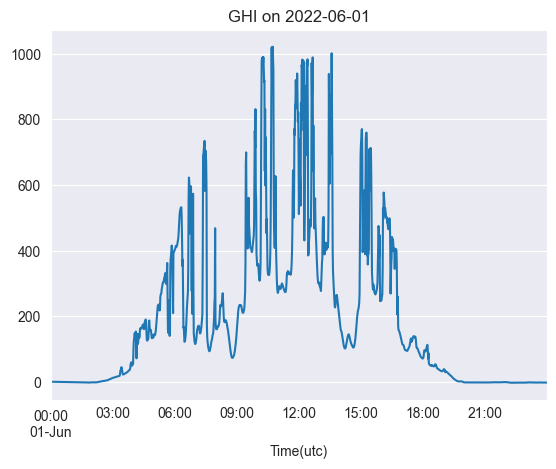

In [16]:
# select random date and plot the GHI
date = '2023-03-01'
df.loc[date, 'GHI'].plot()
plt.title(f'GHI on {date}')
plt.show()